In [3]:
import warnings as w
w.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
df = pd.read_csv('titanic.csv')
print(df.shape)
df.head()

(891, 12)


,passenger_id,name,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
df.isna().sum()

passenger_id      0
name              0
p_class           0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              9
cabin           687
embarked          2
survived          0
dtype: int64

In [6]:
# Step 5: Drop columns that do not add much value (passenger_id, name, sib_sp, parch, ticket, cabin, embarked)
df = df.drop(columns=['passenger_id', 'name', 'sib_sp', 'parch', 'ticket', 'cabin', 'embarked'],axis = 1)

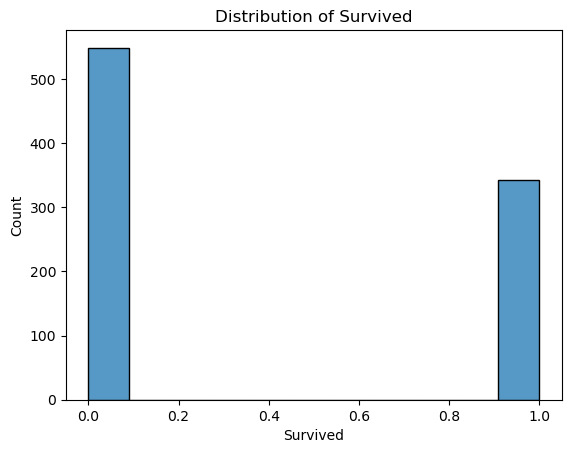

In [11]:
sns.histplot(df.survived)
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

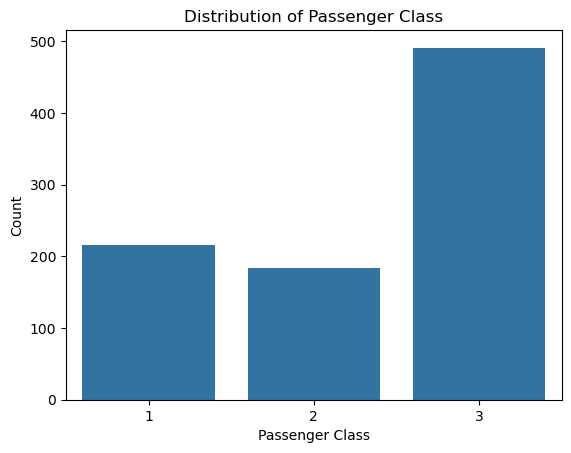

In [12]:
sns.countplot(x='p_class', data=df)
plt.title('Distribution of Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

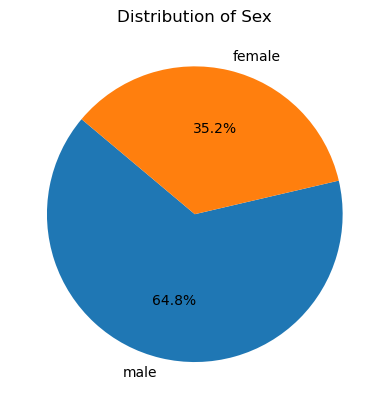

In [13]:
# Step 7: Visualize the distribution of 'sex' using a pie chart (percentage)
sex_counts = df['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sex')
plt.show()

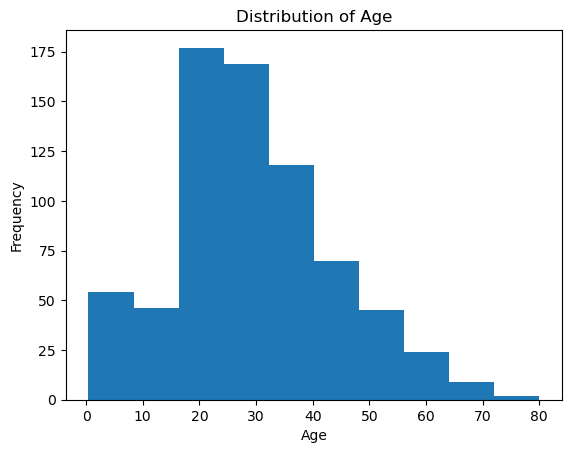

In [14]:
df.age.plot(kind = 'hist',title = 'Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

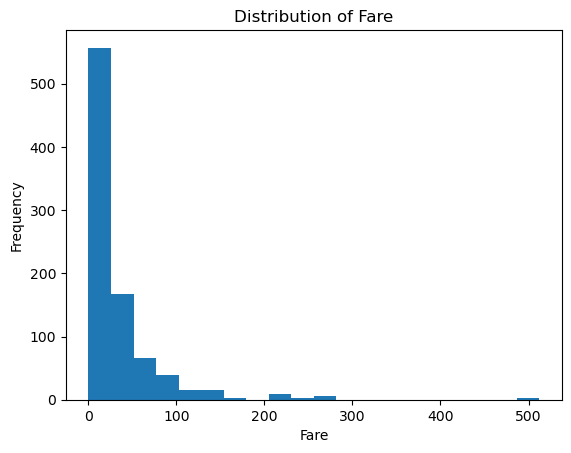

In [15]:
# Step 9: Visualize the distribution of 'fare' using a histogram
df['fare'].plot(kind='hist', bins=20, title='Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

In [16]:
# Step 1: Fill in missing values in the 'age' and 'fare' columns with their median values
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

In [17]:
df = pd.get_dummies(df,columns = ['sex'] , drop_first = True)
df.head()

,p_class,age,fare,survived,sex_male
0,3,22.0,7.2500,0,True
1,1,38.0,71.2833,1,False
2,3,26.0,14.4542,1,False
3,1,35.0,53.1000,1,False
4,3,35.0,8.0500,0,True


In [18]:
scaler = StandardScaler()
df.fare = scaler.fit_transform(df[['fare']])

In [19]:
# Step 4: Select the features and target variable for modeling
features = ['p_class', 'sex_male', 'age', 'fare']
X = df[features]
y = df['survived']

# Step 5: Split the dataset into training and testing sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Step 1: Initialize and train a Gaussian Naive Bayes model using the training data
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set using the trained model
y_pred = gnb_model.predict(X_test)

In [21]:
# Step 3: Evaluate the model using a classification report and print the report
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred))

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       157
           1       0.73      0.74      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



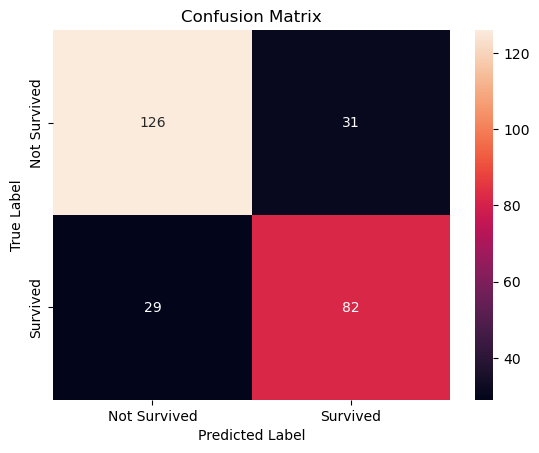

In [22]:
# Step 4: Visualize the confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()